# Introduction

### 1.	Background:

 The world happiness report gives us a clear understanding of rankings of different countries based on happiness quotient of people. It is based on several factors which vary from country to country and depending on how they vary a score is given to each country. Highest scorer is the happiest country. These scores change from year to year based on different attributes like GDP etc. 

### 2.	Problem:

 The data collected in this regard will help us find the score of additionally added countries based on the previous sets of data. This in turn would produce an overall rank and score of new countries. Apart from this, data can also be used to determine what factors play an important role in determining the happiness quotient of an individual country and the project aims to predict how countries can improve their happiness quotient.

### 3.	Interest:

 Now understanding why looking at such a data set is important. For any organization, no matter how small or big, it is important to keep a check on the mental state of the people working there. Only then, the organization grows altogether. Making sure working people are happy lets organizations work more efficiently.
 
# Data 

### 1.	Data Sources:
The main source of this data set has been Kaggle where individual data sets of different years is available. For this project I’m considering the 2019 year’s data. 

### 2.	Data Insights:
The data consists of seven different variables each of which are numerical values. The numerical values range from 0 and go all the way above. Based on the values of independent feature sets, a score is derived for each country which decides the rank of the country. There are 155 countries data that is available for modelling this project’s model. The independent feature sets namely GDP, social support, healthy life expectancy, freedom to make life choices, generosity, perceptions of corruption are used for finding the dependent variable which is the score. It is also clearly visible from the table that Country or Region column is filled with country names which is non numeric value. Nevertheless since, we are not utilizing this column for our findings it can remain as it is.

### 3.	Approach:
The idea is to utilize 30% of this data to train the model and use the remaining 70% to see how accurate the model is working. Also, when a new country is added to the data we can determine its rank based on the working model available with us.



In [5]:
import numpy as np
import pandas as pd

df= pd.read_csv("C:/Users/SHASHANK/Desktop/Data Science Assignment/2019.csv")
df.rename(columns={"Overall rank":"Rank","Country or region":"Country","GDP per capita":"GDP", "Social support":"SS", "Healthy life expectancy":"Life_expectancy", "Freedom to make life choices":"Freedom", "Perceptions of corruption":"Perceptions"}, inplace=True)

In [8]:
import matplotlib.pyplot as plt

In [9]:
import pylab as pl

In [6]:
cdf=df[["Country","Score"]]

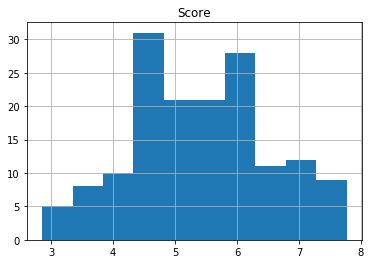

In [10]:
viz=cdf[["Score","Country"]]
viz.hist()
plt.show()

### Data Cleaning
The data is cleaned by transforming all the available data into the format required for operations. Generally for all machine learning activities, we use numeric variables(float). The necessary columns required for operating on this data are separated by creating a different dataframe. 

If we look at the data available to us, we have Score which is the determining variable and the rest like GDP, Social Support, Life Expectancy, Freedom, Generosity, Perceptions, are variables which decide the score based on weightage factor.
For this very purpose all the variables are seperated into a different dataframe mdf, where the required variables are used for training and testing the given data set.

In [21]:
mdf=df[["Score","GDP","SS","Life_expectancy","Freedom","Generosity","Perceptions"]]
mdf=mdf.astype(float)

### Modelling 
Once the given data is all cleaned and filtered through, the next step is to train and test the data. This is done using various methods available based on the data and the type of prediction required. Here we are doing a linear regression on the model to see how different attributes play a role in changing the overall score of the country. Below we can see the dependency of score on GDP. here the independent variable GDP varies from country to country. But from the scatter plot below we can see a correlation between GDP and score. When the independent variable GDP is increasing there is a rise in score thereby leading to positive correlation.

In [22]:
msk= np.random.rand(len(df))<0.8
train = mdf[msk]
test= mdf[~msk]

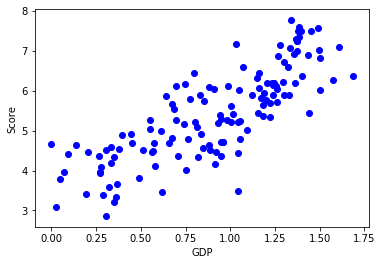

In [23]:
plt.scatter(train.GDP, train.Score, color="blue")
plt.xlabel("GDP")
plt.ylabel("Score")
plt.show()

### Traing and testing the model
For training the model, we first breakdown the given data set into a (70,30) or (80,20) split where the first value within the brackets is used for training the model and the second value for testing. 
For this example we are using linear regression method for training the dataset as it gives us a clear understanding of the correlation between the variables. We use the sklearn package for doing the linear regression on the model. We then get the coefficients and intercepts for the model.
In the testing phase, we utilise the data we got from training to test the model.

In [29]:
from sklearn import linear_model
regr= linear_model.LinearRegression()
train_x=np.asanyarray(train[["GDP"]])
train_y=np.asanyarray(train[["Score"]])
regr.fit (train_x,train_y)
print("Coefficients: ", regr.coef_)
print("Intercept: ",regr.intercept_)

Coefficients:  [[2.2273047]]
Intercept:  [3.39294537]


Text(0, 0.5, 'Score')

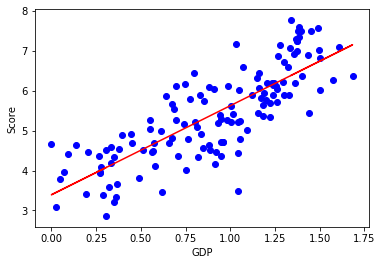

In [30]:
plt.scatter(train.GDP, train.Score, color="blue")
plt.plot(train_x, regr.coef_[0][0]*train_x+regr.intercept_[0], "-r")
plt.xlabel("GDP")
plt.ylabel("Score")

In [ ]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[["GDP"]])
test_y=np.asanyarray(test[["Score"]])
test_y_hat=regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat-test_y)**2))
print("R2-score: %.2f" % r2_score(test_y_hat, test_y))

### Evaluation and Conclusion
An attempt has been made to understand training and testing of the happiness dataset. There are various possible models available to perform the evaluation of such models, but linear regression gives us a better clarity on correlations, which is why it was chosen. Since the available data set was quite small with very less values the model might not have given the perfect evaluations but there is a future prospectus to it, where we can determine the overall score of a new country when given its other independent variable values. 